In [30]:
# Setup
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from skimage import io

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1. Load image and trim ROI

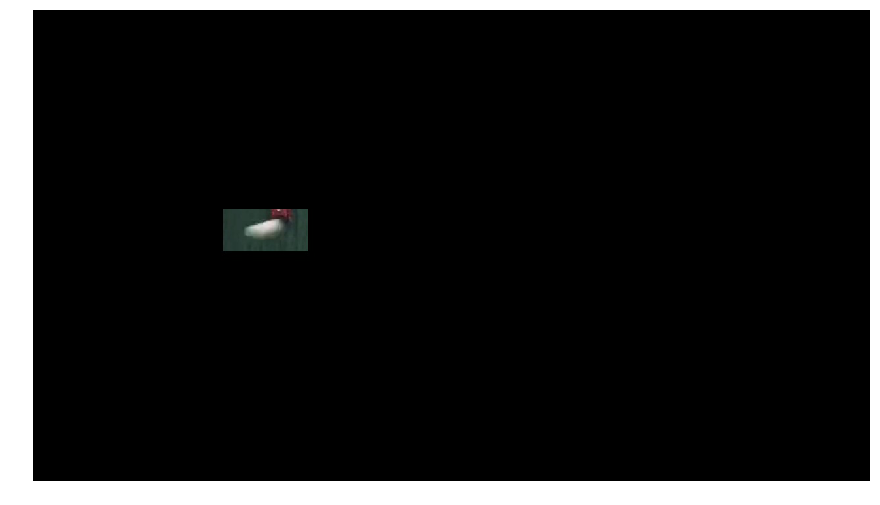

In [31]:
# Load data and preview
img = io.imread('./data_bb/bbResIm_00011.jpg')

H, W, C = img.shape

plt.imshow(img)
plt.axis('off')
plt.show()


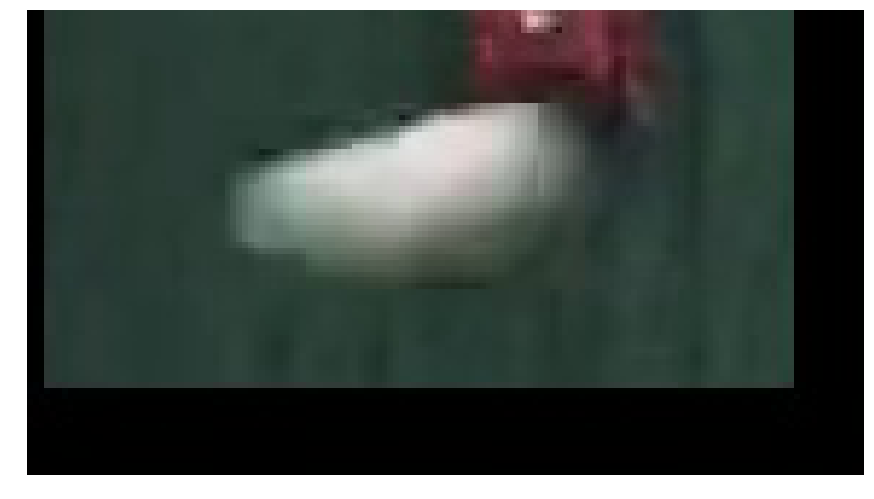

In [32]:
# Find ROI and trim
img_avg = np.mean(img, axis = 2)
ys, xs = np.nonzero(img_avg)
ymin = np.min(ys)
ymax = np.max(ys)
xmin = np.min(xs)
xmax = np.max(xs)

img_roi = img[ymin:ymax+1, xmin:xmax+1, :]

plt.imshow(img_roi)
plt.axis('off')
plt.show()


/Users/minminzhang/.virtualenvs/CS131/lib/python3.7/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/Users/minminzhang/.virtualenvs/CS131/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/minminzhang/.virtualenvs/CS131/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


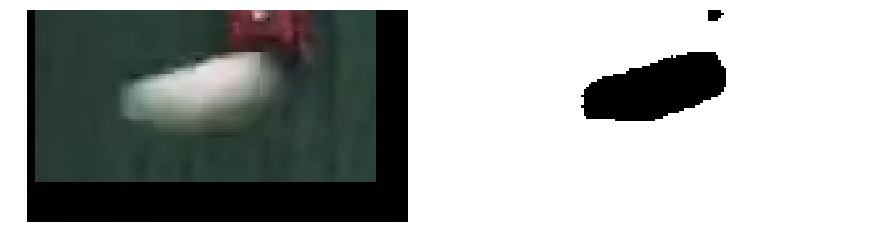

In [34]:
# k-means segmentation
from utils import compute_segmentation
from segmentation import kmeans_fast, color_features, color_position_features

num_segments = 2
clustering_fn = kmeans_fast
feature_fn = color_features
scale = 1

segment = compute_segmentation(img_roi, num_segments,
                                clustering_fn = clustering_fn,
                              feature_fn = feature_fn,
                              scale = scale)

plt.figure()
plt.subplot(121)
plt.imshow(img_roi)
plt.axis('off')

plt.subplot(122)
plt.imshow(segment)
plt.axis('off')

plt.show()